Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
from statsmodels.compat import lzip

## Numpy

Reshape

In [2]:
arr = np.arange(1,10).reshape(3,3)
print(arr)

flatArr = arr.reshape(1,9)[0]
print(flatArr)
print(arr.flatten())
print(arr.reshape(-1))
print(flatArr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]


Splitting

In [3]:
arr = np.arange(1,17).reshape(4,4)
print(arr)
upper, lower = np.vsplit(arr, [1])
print("Upper : ",upper)
print("Lower :", lower)
horizontalSplits = np.hsplit(arr, [1])
print(len(horizontalSplits))
print(horizontalSplits[0])
print(horizontalSplits[1])
# print(horizontalSplits[2])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Upper :  [[1 2 3 4]]
Lower : [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
2
[[ 1]
 [ 5]
 [ 9]
 [13]]
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]
 [14 15 16]]


Normalize

In [4]:
arr = np.random.randint(100, size=(1,10))

def normalize(nums):
    '''
    1-D normalization of an array
    '''
    print(nums)
    arr_max, arr_min = np.max(nums), np.min(nums)
    nums = (nums - arr_min)/ (arr_max - arr_min)
    return nums
print(normalize(arr))

[[63 87 54 53 20 36 51 60  0 16]]
[[0.72413793 1.         0.62068966 0.6091954  0.22988506 0.4137931
  0.5862069  0.68965517 0.         0.18390805]]


Diagonal

In [5]:
arr = np.arange(1,17).reshape(4,4)
np.diagonal(arr)


array([ 1,  6, 11, 16])

Sorting

In [6]:
data_url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/weather_2012.csv'
weather = pd.read_csv(data_url)
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
weather.sort_values(by=['Temp (C)'], ascending=False)
weather.head(6)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog


In [8]:
weather.sort_index()

weather.sort_values(by=['Weather', 'Temp (C)'], ascending=[True, False])

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
5199,2012-08-04 15:00:00,32.8,18.8,44,17,24.1,101.39,Clear
5200,2012-08-04 16:00:00,32.5,18.5,44,15,24.1,101.34,Clear
5201,2012-08-04 17:00:00,32.5,19.8,47,13,24.1,101.32,Clear
5198,2012-08-04 14:00:00,32.0,18.3,44,17,24.1,101.48,Clear
4671,2012-07-13 15:00:00,31.9,12.3,30,22,48.3,101.46,Clear
...,...,...,...,...,...,...,...,...
3581,2012-05-29 05:00:00,11.0,8.9,87,15,12.9,100.14,"Thunderstorms,Rain Showers"
4761,2012-07-17 09:00:00,22.9,21.3,91,17,9.7,99.84,"Thunderstorms,Rain Showers,Fog"
5108,2012-07-31 20:00:00,22.4,18.7,80,35,9.7,100.64,"Thunderstorms,Rain Showers,Fog"
4323,2012-06-29 03:00:00,19.5,16.1,81,7,9.7,99.71,"Thunderstorms,Rain Showers,Fog"


## Seaborn

In [9]:
np.random.seed(1234)
'''
loc --> mean
scale --> staandar deviation
size --> number of elements in the array
'''
arr = np.random.normal(loc=440, scale=100, size=1000)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


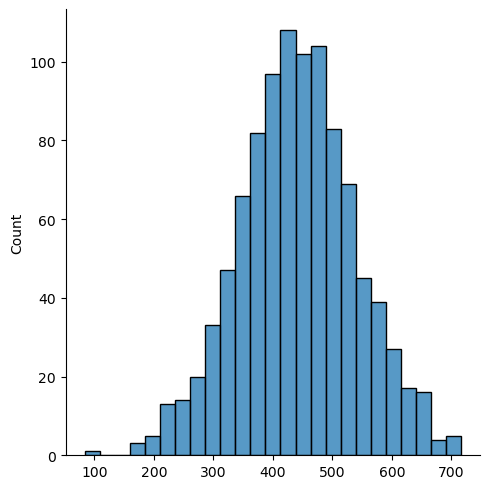

In [10]:
sns.displot(arr)

## Statsmodels

In [11]:
data = sm.datasets.get_rdataset("Guerry","HistData").data
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [19]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=data).fit()
'''
Here we are saying that `Lottery` depends on `Literacy` and (np.log(Pop1831)) is used for taking log values of 
numbers in Literacy column. Not needed, but helps in reducing maths as numbers brcome smaller.
'''
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.90e-08
Time:                        12:26:36   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Models

In [13]:
%matplotlib inline

In [14]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)


In [21]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [17]:
prestige_model = smf.ols("prestige ~ income + education", data=prestige).fit()
prestige_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           8.65e-17
Time:                        12:19:26   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

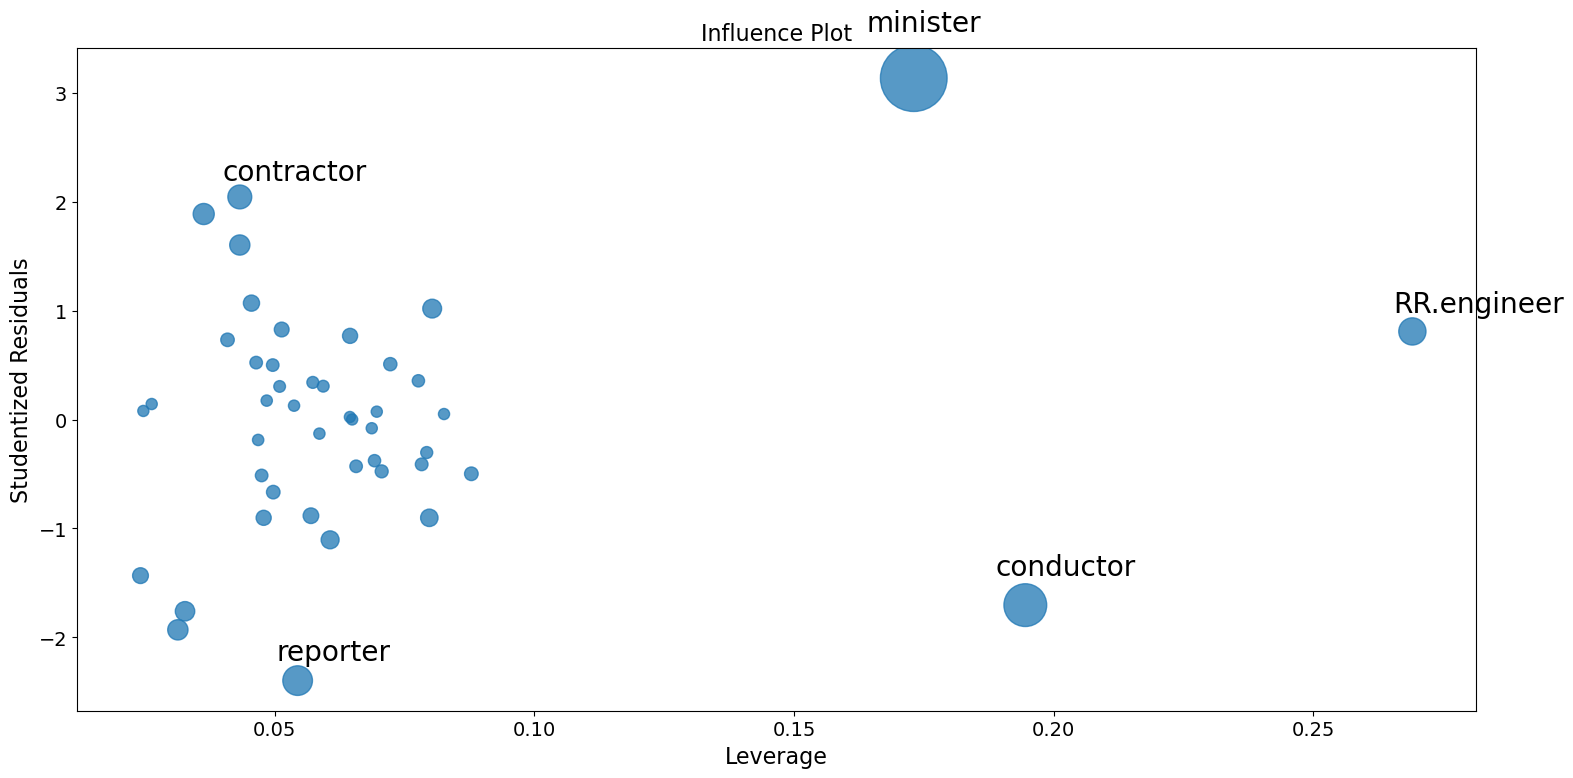

In [18]:
fig = sm.graphics.influence_plot(prestige_model, criterion="cooks")
fig.tight_layout(pad=1.0)

Correlation

In [25]:
x = np.arange(1,10)
y = np.arange(9,0,-1)
print(x,y)

sigma = np.corrcoef(x,y)
print(sigma)



[1 2 3 4 5 6 7 8 9] [9 8 7 6 5 4 3 2 1]
[[ 1. -1.]
 [-1.  1.]]
